<img src="TP1.png" />
<center><font size='6px' color='#3383FF'><b>Compte rendu TP2 : Segmentation d'une image</b></font>
</center>
<br />
<br />
<br />
<font size='4px' color='#7A33FF'><b>Samar Khlifi </b></font>
<br />
<br />
<font size='3px' color='#7A33FF'><b>3 DNI Groupe 2</b></font>
<br />
<br />

 

<h2><font color='#8B2B1C'>Partie I:</font></h2> 

<h2><font color='#FF3346'>I - Clustering:L'algorithme de K-means :</font></h2> 

In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

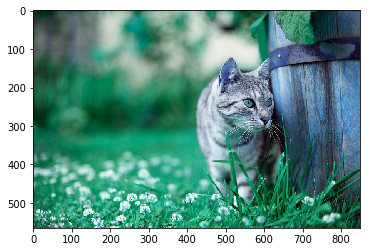

In [37]:
image = cv2.imread('chat.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 5)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]


#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('chat5.jpg', quant)
plt.imshow(image)

cv2.imread('chat.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
!pip install opencv-python

<h2><font color='#FF3346'>II - Le bruit :</font></h2> 

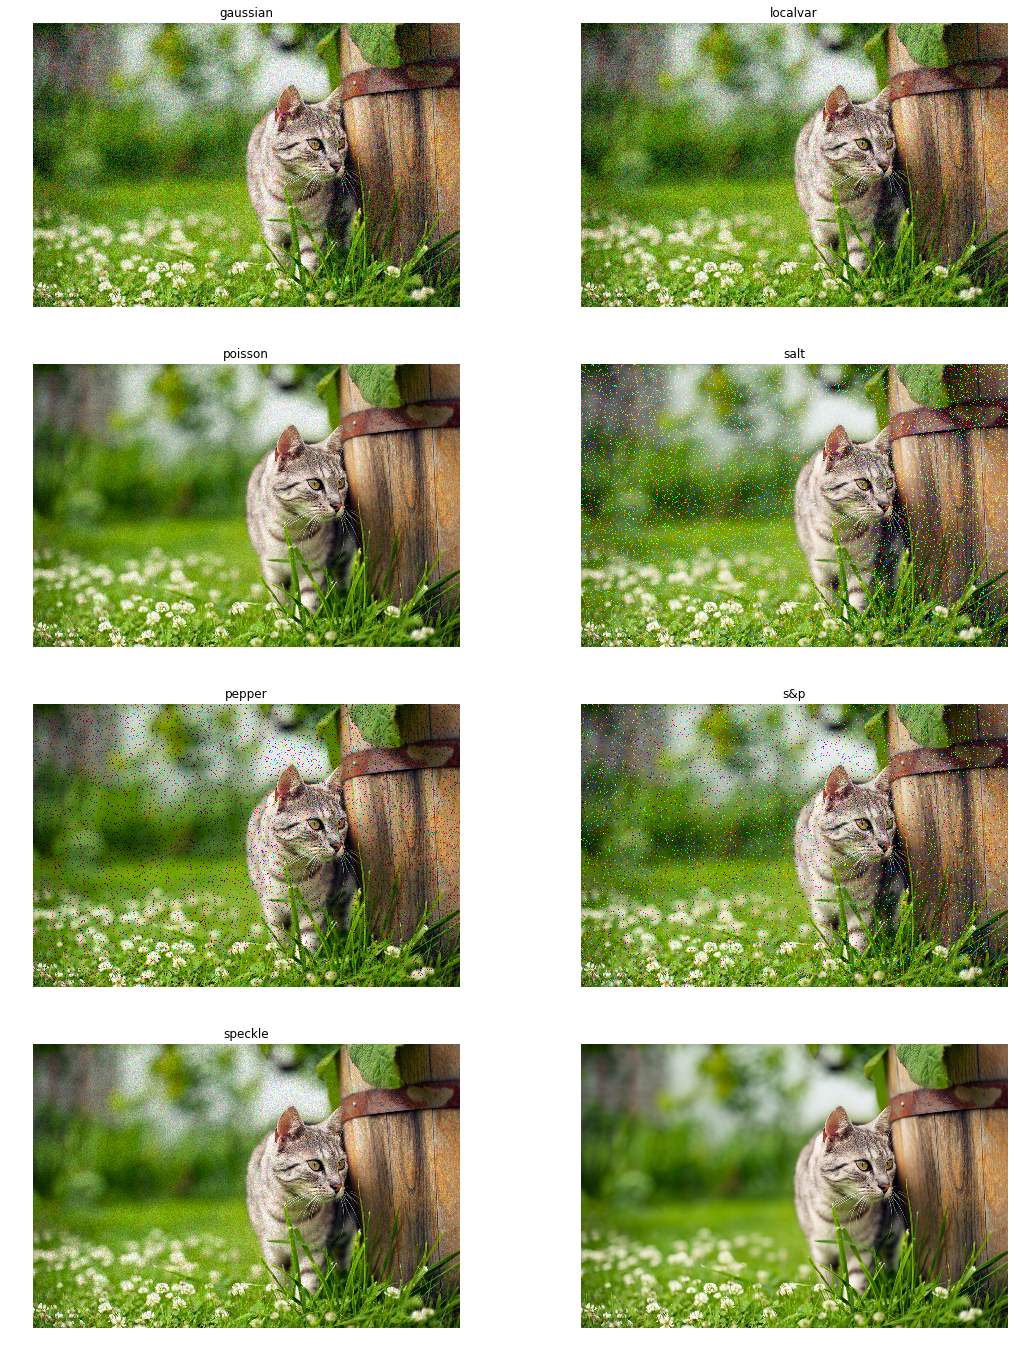

In [23]:
import skimage.io
import matplotlib.pyplot as plt

img_path="chat.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


<h2><font color='#FF3346'>III - Débruitage</font></h2> 

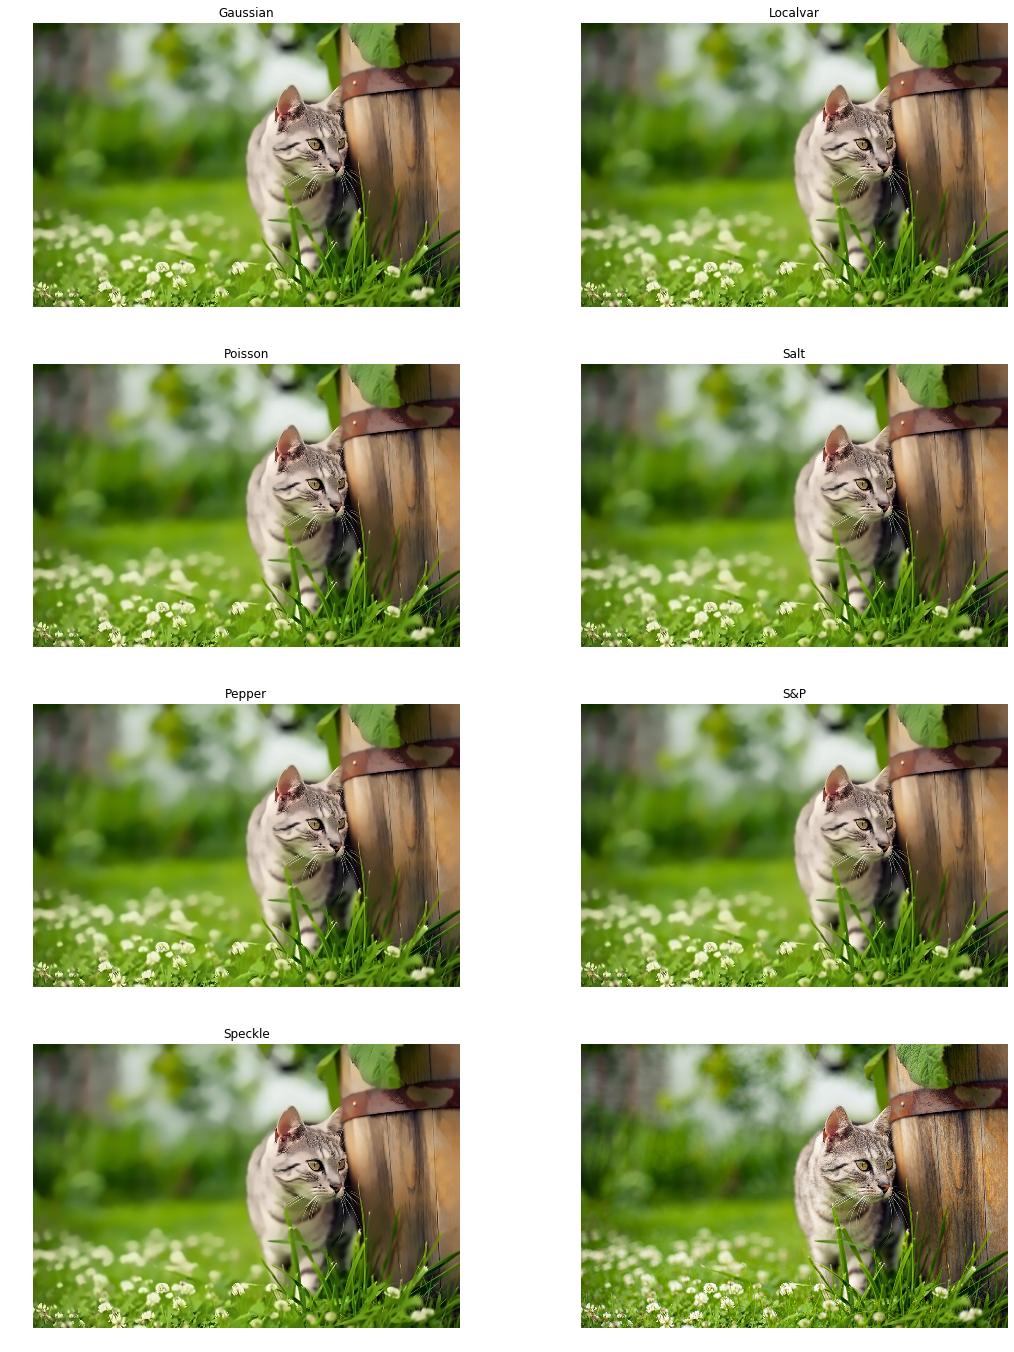

In [35]:
images = cv2.imread('chat.jpg')
b,g,r = cv2.split(images)          
rgb_img = cv2.merge([r,g,b])

def plotdenoising(rgb_img, mode, b, g, r):
    plt.subplot(b,g,r)
    if mode is not None:
        dst = cv2.fastNlMeansDenoisingColored(rgb_img,None,10,10,7,21)        
        plt.imshow(dst)
        b,g,r = cv2.split(dst)      
        rgb_dst = cv2.merge([r,g,b])
        
    if mode is None:
        plt.imshow(rgb_img)
    plt.title(mode)
    plt.axis("off")     
rgb_dst = cv2.merge([r,g,b])
plt.figure(figsize=(18,24))
b=4
g=2
plotdenoising(rgb_dst, "Gaussian", b,g,1)
plotdenoising(rgb_dst, "Localvar", b,g,2)
plotdenoising(rgb_dst, "Poisson", b,g,3)
plotdenoising(rgb_dst, "Salt", b,g,4)
plotdenoising(rgb_dst, "Pepper", b,g,5)
plotdenoising(rgb_dst, "S&P", b,g,6)
plotdenoising(rgb_dst, "Speckle", b,g,7)
plotdenoising(rgb_dst, None, b,g,8)
plt.show()

<h2><font color='#8B2B1C'>Partie II:</font></h2> 

In [2]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def segm(k):
    image = cv2.imread('chat.jpg')
    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters = k)
    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

    plt.figure(figsize=(10,11))
    cv2.imwrite('chat33.jpg', quant)
    return plt.imshow(image)
plt.show()

In [3]:
interact(segm,k=widgets.IntSlider(min=2, max=4, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=4, min=2), Output()), _dom_classes=('widget-inte…

In [4]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

img_path="chat.jpg"
img = skimage.io.imread(img_path)/255.0
 

def plotnoise(mode):
    img_path="chat.jpg"
    img = skimage.io.imread(img_path)/255.0
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","Poisson","Salt"]);


plt.show()

<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'Poisson', 'Salt'), value=…